In [1]:
# To handle datasets
import pandas as pd
import numpy as np
from tqdm import tqdm

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


# For the yeo-johnson transformation
import scipy.stats as stats

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
train_set = pd.read_csv('./train_set.csv')

C:\Users\adamz\AppData\Local\Temp\ipykernel_15144\606335818.py:1: DtypeWarning: Columns (71,72,73,75,76,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv('./train_set.csv')


# Select feats without any impact on price to remove from DataFrame

In [3]:
train_set.head()

,level_0,index,id,price_details,price_value,price_currency,seller_name,seller_type,amenities,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Możliwość finansowania,Pierwszy właściciel,Oferta od,Liczba drzwi,Przebieg,Moc,Metalik,Typ,Kolor,Model pojazdu,Stan,Kategoria,Serwisowany w ASO,Napęd,Leasing,Rok produkcji,Marka pojazdu,Faktura VAT,Pierwsza rejestracja,Zarejestrowany w Polsce,VAT marża,Wersja,VIN,Perłowy,Uszkodzony,Kod Silnika,Filtr cząstek stałych,Emisja CO2,Miesięczna rata,Liczba pozostałych rat,Opłata początkowa,Wartość wykupu,Akryl (niemetalizowany),Tuning,Kierownica po prawej (Anglik),Homologacja ciężarowa,Make,Metallic,Engine capacity,Version,VAT discount,No accident,Mileage,Service record,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Model,Color,Country of origin,Body type,Year,Matowy,Acrylic,Financing option,Registered in Poland,Original owner,First registration,Pearl,Zarejestrowany jako zabytek,VAT free,Engine Code,Particle filter,Leasing concession,Damaged,CO2 emissions,Monthly payment value,Region,Type,Company
0,0,7,7,"Cena Brutto, Faktura VAT",63 900,PLN,TRANS-AUTO SP. Z O.O. DEALER MARKI ...,Dealer,38,Tak,5.0,Polska,1 199 cm3,Benzyna,Manualna,Tak,Tak,Firmy,5.0,200 km,110 KM,Tak,Kompakt,Czarny,C4 Cactus,Używane,Osobowe,Tak,Na przednie koła,Tak,2017.0,Citroën,Tak,15 listopad 2017,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4 Cactus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Osobowe,Citroën
1,1,10,10,Cena Brutto,41 900,PLN,DECAR - RENAULT i DACIA,Dealer,24,NaN,5.0,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Tak,Tak,Firmy,5.0,118 808 km,117 KM,NaN,SUV,Czarny,Juke,Używane,Osobowe,NaN,NaN,NaN,2012.0,Nissan,NaN,15 czerwiec 2012,Tak,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mazowieckie,Osobowe,Nissan
2,2,11,11,"Cena Brutto, Do negocjacji",17 950,PLN,SKUP SPRZEDAŻ ZAMIANA RATY,Dealer,28,Tak,5.0,Niemcy,1 364 cm3,Benzyna,Manualna,NaN,Tak,Firmy,3.0,106 000 km,90 KM,Tak,Coupe,Czarny,Astra,Używane,Osobowe,Tak,Na przednie koła,NaN,2008.0,Opel,NaN,NaN,NaN,Tak,H (2004-2014),W0L0AHL0885059779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Astra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Osobowe,Opel
3,3,14,14,"Cena Brutto, Do negocjacji",38 000,PLN,NaN,Osoba prywatna,35,NaN,5.0,Niemcy,1 798 cm3,Benzyna,Manualna,NaN,NaN,Osoby prywatnej,5.0,172 758 km,160 KM,NaN,Sedan,Czarny,A4,Używane,Osobowe,Tak,Na przednie koła,NaN,2008.0,Audi,NaN,7 marzec 2008,Tak,NaN,B8 (2007-2015),WAUZZZ8K58A023087,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Osobowe,Audi
4,4,16,16,Cena Brutto,21 900,PLN,NaN,Osoba prywatna,23,Tak,5.0,Niemcy,1 250 cm3,Benzyna,Manualna,NaN,NaN,Osoby prywatnej,5.0,97 128 km,82 KM,Tak,Auta miejskie,Bordowy,Fiesta,Używane,Osobowe,Tak,Na przednie koła,NaN,2010.0,Ford,NaN,NaN,NaN,Tak,Mk7 (2008-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Osobowe,Ford


In [4]:
feats_to_remove = ['level_0', 'index', 'id', 'price_details', 'price_currency', 'seller_name', 'Leasing', 'VIN', 'Możliwość finansowania',
                   'Faktura VAT', 'Pierwsza rejestracja', 'Zarejestrowany w Polsce', 'Wersja', 'Filtr cząstek stałych', 'Kod Silnika', 
                   'Monthly payment value', 'Leasing concession', 'Particle filter', 'Engine Code', 'VAT free', 'Zarejestrowany jako zabytek', 
                   'First registration', 'Original owner', 'Registered in Poland', 'Financing option', 'Year', 'Body type', 'Country of origin',
                  'Service record', 'VAT discount', 'Homologacja ciężarowa', 'Tuning', 'Kierownica po prawej (Anglik)', 'Wartość wykupu',
                  'Opłata początkowa', 'Liczba pozostałych rat', 'Miesięczna rata', 'Serwisowany w ASO', 'Version', 'VAT marża', 
                   'Pierwszy właściciel', 'Type', 'Model', 'seller_type', 'Model pojazdu', 'Kategoria']

In [5]:
train_set = train_set.drop(feats_to_remove, axis=1)

In [6]:
train_set.head()

,price_value,amenities,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Oferta od,Liczba drzwi,Przebieg,Moc,Metalik,Typ,Kolor,Stan,Napęd,Rok produkcji,Marka pojazdu,Perłowy,Uszkodzony,Emisja CO2,Akryl (niemetalizowany),Make,Metallic,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Matowy,Acrylic,Pearl,Damaged,CO2 emissions,Region,Company
0,63 900,38,Tak,5.0,Polska,1 199 cm3,Benzyna,Manualna,Firmy,5.0,200 km,110 KM,Tak,Kompakt,Czarny,Używane,Na przednie koła,2017.0,Citroën,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Citroën
1,41 900,24,NaN,5.0,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Firmy,5.0,118 808 km,117 KM,NaN,SUV,Czarny,Używane,NaN,2012.0,Nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mazowieckie,Nissan
2,17 950,28,Tak,5.0,Niemcy,1 364 cm3,Benzyna,Manualna,Firmy,3.0,106 000 km,90 KM,Tak,Coupe,Czarny,Używane,Na przednie koła,2008.0,Opel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Opel
3,38 000,35,NaN,5.0,Niemcy,1 798 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,172 758 km,160 KM,NaN,Sedan,Czarny,Używane,Na przednie koła,2008.0,Audi,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Audi
4,21 900,23,Tak,5.0,Niemcy,1 250 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,97 128 km,82 KM,Tak,Auta miejskie,Bordowy,Używane,Na przednie koła,2010.0,Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Ford


In [7]:
train_set.shape

(80126, 42)

# Preprocessing target variable

In [8]:
data_type = train_set['price_value'].dtypes

In [9]:
print(data_type)

object


In [10]:
train_set['price_value'] = train_set['price_value'].str.replace(' ', '')

In [11]:
for i in range(train_set['price_value'].shape[0]):
    if ',' in train_set['price_value'][i]:
        train_set['price_value'][i] = train_set['price_value'][i][:-3]
    else:
        continue

C:\Users\adamz\AppData\Local\Temp\ipykernel_15144\197115555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['price_value'][i] = train_set['price_value'][i][:-3]


In [12]:
train_set['price_value'] = train_set['price_value'].astype(float)

In [13]:
train_set.head()

,price_value,amenities,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Oferta od,Liczba drzwi,Przebieg,Moc,Metalik,Typ,Kolor,Stan,Napęd,Rok produkcji,Marka pojazdu,Perłowy,Uszkodzony,Emisja CO2,Akryl (niemetalizowany),Make,Metallic,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Matowy,Acrylic,Pearl,Damaged,CO2 emissions,Region,Company
0,63900.0,38,Tak,5.0,Polska,1 199 cm3,Benzyna,Manualna,Firmy,5.0,200 km,110 KM,Tak,Kompakt,Czarny,Używane,Na przednie koła,2017.0,Citroën,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Citroën
1,41900.0,24,NaN,5.0,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Firmy,5.0,118 808 km,117 KM,NaN,SUV,Czarny,Używane,NaN,2012.0,Nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mazowieckie,Nissan
2,17950.0,28,Tak,5.0,Niemcy,1 364 cm3,Benzyna,Manualna,Firmy,3.0,106 000 km,90 KM,Tak,Coupe,Czarny,Używane,Na przednie koła,2008.0,Opel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Opel
3,38000.0,35,NaN,5.0,Niemcy,1 798 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,172 758 km,160 KM,NaN,Sedan,Czarny,Używane,Na przednie koła,2008.0,Audi,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Audi
4,21900.0,23,Tak,5.0,Niemcy,1 250 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,97 128 km,82 KM,Tak,Auta miejskie,Bordowy,Używane,Na przednie koła,2010.0,Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,opolskie,Ford


In [14]:
train_set['price_value'] = train_set['price_value'].astype(int)

C:\Users\adamz\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [15]:
train_set['price_value'].describe()

count    8.012600e+04
mean     2.153789e+04
std      7.587052e+06
min     -2.147484e+09
25%      1.390000e+04
50%      2.552500e+04
75%      5.290000e+04
max      2.545412e+06
Name: price_value, dtype: float64

In [16]:
value_to_remove = -2147483648

In [17]:
train_set = train_set[train_set['price_value'] != value_to_remove]

In [18]:
train_set.reset_index(inplace = True)

In [19]:
train_set['price_value'].describe()

count    8.012500e+04
mean     4.833982e+04
std      7.313688e+04
min      5.000000e+02
25%      1.390000e+04
50%      2.555000e+04
75%      5.290000e+04
max      2.545412e+06
Name: price_value, dtype: float64

Text(0.5, 0, 'price_value')

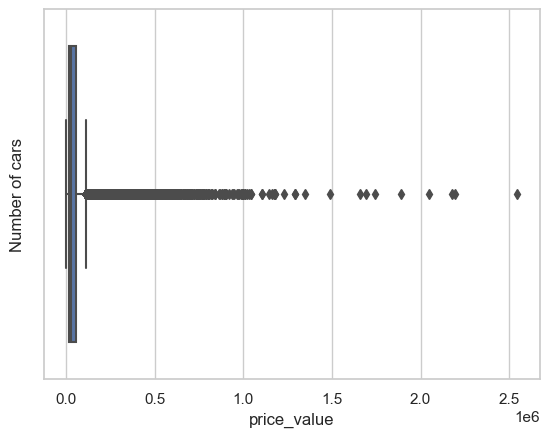

In [20]:
sns.boxplot(data=train_set, x=train_set['price_value'])
plt.ylabel('Number of cars')
plt.xlabel('price_value')

Text(0.5, 0, 'Sale Price')

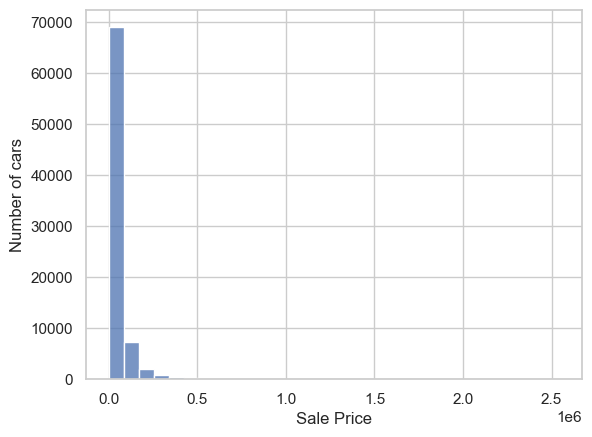

In [21]:
sns.histplot(data=train_set, x=train_set['price_value'], bins = 30, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Sale Price')

Text(0.5, 0, 'Sale Price')

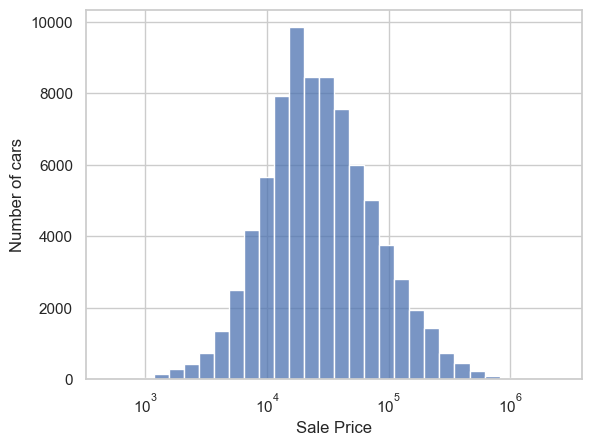

In [22]:
sns.histplot(data=train_set, x=train_set['price_value'], bins = 30, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Sale Price')

In [23]:
train_set['Price'] = np.log(train_set['price_value'])

## Merge polish and english name of columns

In [24]:
def join_eng_pol_column(df, col_eng, col_pol):
    for i in range(len(col_eng)):
        for j in range(df.shape[0]):
            if pd.isna(df.at[j, col_eng[i]]) == True:
                df.at[j, col_eng[i]] = df.at[j, col_pol[i]]
            else:
                continue
    return df

In [25]:
col_name = train_set.columns

In [26]:
for item in col_name:
    print(item)

index
price_value
amenities
Bezwypadkowy
Liczba miejsc
Kraj pochodzenia
Pojemność skokowa
Rodzaj paliwa
Skrzynia biegów
Oferta od
Liczba drzwi
Przebieg
Moc
Metalik
Typ
Kolor
Stan
Napęd
Rok produkcji
Marka pojazdu
Perłowy
Uszkodzony
Emisja CO2
Akryl (niemetalizowany)
Make
Metallic
Engine capacity
No accident
Mileage
Door count
Fuel type
Nr of seats
Gearbox
Transmission
Engine power
Color
Matowy
Acrylic
Pearl
Damaged
CO2 emissions
Region
Company
Price


In [27]:
col_pol = ['Liczba miejsc', 'Liczba drzwi', 'Rodzaj paliwa', 'Pojemność skokowa', 'Bezwypadkowy', 'Kolor', 'Uszkodzony',
           'Emisja CO2', 'Skrzynia biegów', 'Moc', 'Przebieg', 'Marka pojazdu', 'Napęd', 'Make',
           'Akryl (niemetalizowany)', 'Metalik', 'Perłowy']

In [28]:
col_eng = ['Nr of seats', 'Door count', 'Fuel type', 'Engine capacity', 'No accident', 'Color', 'Damaged', 'CO2 emissions',
           'Gearbox', 'Engine power', 'Mileage', 'Company', 'Transmission', 'Company', 'Acrylic', 'Metallic',
           'Pearl']

In [29]:
join_eng_pol_column(train_set, col_eng, col_pol)

,index,price_value,amenities,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Oferta od,Liczba drzwi,Przebieg,Moc,Metalik,Typ,Kolor,Stan,Napęd,Rok produkcji,Marka pojazdu,Perłowy,Uszkodzony,Emisja CO2,Akryl (niemetalizowany),Make,Metallic,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Matowy,Acrylic,Pearl,Damaged,CO2 emissions,Region,Company,Price
0,0,63900,38,Tak,5.0,Polska,1 199 cm3,Benzyna,Manualna,Firmy,5.0,200 km,110 KM,Tak,Kompakt,Czarny,Używane,Na przednie koła,2017.0,Citroën,NaN,NaN,NaN,NaN,NaN,Tak,1 199 cm3,Tak,200 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,110 KM,Czarny,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Citroën,11.065075
1,1,41900,24,NaN,5.0,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Firmy,5.0,118 808 km,117 KM,NaN,SUV,Czarny,Używane,NaN,2012.0,Nissan,NaN,NaN,NaN,NaN,NaN,NaN,1 598 cm3,NaN,118 808 km,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117 KM,Czarny,NaN,NaN,NaN,NaN,NaN,mazowieckie,Nissan,10.643041
2,2,17950,28,Tak,5.0,Niemcy,1 364 cm3,Benzyna,Manualna,Firmy,3.0,106 000 km,90 KM,Tak,Coupe,Czarny,Używane,Na przednie koła,2008.0,Opel,NaN,NaN,NaN,NaN,NaN,Tak,1 364 cm3,Tak,106 000 km,3.0,Benzyna,5.0,Manualna,Na przednie koła,90 KM,Czarny,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Opel,9.795345
3,3,38000,35,NaN,5.0,Niemcy,1 798 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,172 758 km,160 KM,NaN,Sedan,Czarny,Używane,Na przednie koła,2008.0,Audi,Tak,NaN,NaN,NaN,NaN,NaN,1 798 cm3,NaN,172 758 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,160 KM,Czarny,NaN,NaN,Tak,NaN,NaN,opolskie,Audi,10.545341
4,4,21900,23,Tak,5.0,Niemcy,1 250 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,97 128 km,82 KM,Tak,Auta miejskie,Bordowy,Używane,Na przednie koła,2010.0,Ford,NaN,NaN,NaN,NaN,NaN,Tak,1 250 cm3,Tak,97 128 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,82 KM,Bordowy,NaN,NaN,NaN,NaN,NaN,opolskie,Ford,9.994242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80120,80121,22800,27,Tak,NaN,NaN,200 cm3,Diesel,NaN,Firmy,NaN,220 000 km,136 KM,NaN,sedan/coupe/cabrio,Srebrny,Używane,NaN,2007.0,BMW,NaN,NaN,NaN,NaN,NaN,NaN,200 cm3,Tak,220 000 km,NaN,Diesel,NaN,NaN,NaN,136 KM,Srebrny,NaN,NaN,NaN,NaN,NaN,mazowieckie,BMW,10.034516
80121,80122,29900,34,NaN,5.0,Niemcy,1 995 cm3,Diesel,Manualna,Osoby prywatnej,5.0,110 000 km,116 KM,Tak,Kompakt,Szary,Używane,Na tylne koła,2009.0,BMW,NaN,NaN,NaN,NaN,NaN,Tak,1 995 cm3,NaN,110 000 km,5.0,Diesel,5.0,Manualna,Na tylne koła,116 KM,Szary,NaN,NaN,NaN,NaN,NaN,dolnoslaskie,BMW,10.305614
80122,80123,42500,0,NaN,NaN,NaN,1 600 cm3,Diesel,Manualna,Osoby prywatnej,NaN,75 000 km,112 KM,NaN,Kompakt,Czarny,Używane,Na przednie koła,2013.0,Citroën,NaN,NaN,NaN,NaN,NaN,NaN,1 600 cm3,NaN,75 000 km,NaN,Diesel,NaN,Manualna,Na przednie koła,112 KM,Czarny,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Citroën,10.657259
80123,80124,4900,14,NaN,5.0,NaN,2 000 cm3,Benzyna,Manualna,Osoby prywatnej,5.0,320 000 km,125 KM,Tak,Kombi,Srebrny,Używane,4x4 (dołączany ręcznie),2000.0,Subaru,NaN,NaN,NaN,NaN,NaN,Tak,2 000 cm3,NaN,320 000 km,5.0,Benzyna,5.0,Manualna,4x4 (dołączany ręcznie),125 KM,Srebrny,NaN,NaN,NaN,NaN,NaN,mazowieckie,Subaru,8.496990


In [30]:
train_set = train_set.drop(col_pol, axis=1)

In [31]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Rok produkcji,Metallic,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Matowy,Acrylic,Pearl,Damaged,CO2 emissions,Region,Company,Price
0,0,63900,38,Polska,Firmy,Kompakt,Używane,2017.0,Tak,1 199 cm3,Tak,200 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,110 KM,Czarny,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Citroën,11.065075
1,1,41900,24,Polska,Firmy,SUV,Używane,2012.0,NaN,1 598 cm3,NaN,118 808 km,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117 KM,Czarny,NaN,NaN,NaN,NaN,NaN,mazowieckie,Nissan,10.643041
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,2008.0,Tak,1 364 cm3,Tak,106 000 km,3.0,Benzyna,5.0,Manualna,Na przednie koła,90 KM,Czarny,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Opel,9.795345
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,2008.0,NaN,1 798 cm3,NaN,172 758 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,160 KM,Czarny,NaN,NaN,Tak,NaN,NaN,opolskie,Audi,10.545341
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,2010.0,Tak,1 250 cm3,Tak,97 128 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,82 KM,Bordowy,NaN,NaN,NaN,NaN,NaN,opolskie,Ford,9.994242


## Create new feat "Lacquer"

In [32]:
lacquer = ['Metallic', 'Matowy', 'Acrylic', 'Pearl']

In [33]:
for col in lacquer:
    for i in range(train_set.shape[0]):
        if pd.isna(train_set.at[i, col]) == False:
            train_set.at[i, col] = col
        else:
            continue

In [34]:
train_set['Lacquer'] = None

In [35]:
for col in lacquer:
    for i in range(train_set.shape[0]):
        if pd.isna(train_set.at[i, 'Lacquer']) == True:
            train_set.at[i, 'Lacquer'] = train_set.at[i, col]
        else:
            continue

In [36]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Rok produkcji,Metallic,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Matowy,Acrylic,Pearl,Damaged,CO2 emissions,Region,Company,Price,Lacquer
0,0,63900,38,Polska,Firmy,Kompakt,Używane,2017.0,Metallic,1 199 cm3,Tak,200 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,110 KM,Czarny,NaN,NaN,NaN,NaN,NaN,warminsko-mazurskie,Citroën,11.065075,Metallic
1,1,41900,24,Polska,Firmy,SUV,Używane,2012.0,NaN,1 598 cm3,NaN,118 808 km,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117 KM,Czarny,NaN,NaN,NaN,NaN,NaN,mazowieckie,Nissan,10.643041,NaN
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,2008.0,Metallic,1 364 cm3,Tak,106 000 km,3.0,Benzyna,5.0,Manualna,Na przednie koła,90 KM,Czarny,NaN,NaN,NaN,NaN,NaN,wielkopolskie,Opel,9.795345,Metallic
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,2008.0,NaN,1 798 cm3,NaN,172 758 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,160 KM,Czarny,NaN,NaN,Pearl,NaN,NaN,opolskie,Audi,10.545341,Pearl
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,2010.0,Metallic,1 250 cm3,Tak,97 128 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,82 KM,Bordowy,NaN,NaN,NaN,NaN,NaN,opolskie,Ford,9.994242,Metallic


In [37]:
train_set = train_set.drop(lacquer, axis=1)

## Create new feat "Age"

In [38]:
train_set['Age'] = None

In [39]:
for i in range(train_set.shape[0]):
    train_set['Age'][i] = 2023 - train_set['Rok produkcji'][i]

C:\Users\adamz\AppData\Local\Temp\ipykernel_15144\1075640571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Age'][i] = 2023 - train_set['Rok produkcji'][i]


In [40]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Rok produkcji,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,CO2 emissions,Region,Company,Price,Lacquer,Age
0,0,63900,38,Polska,Firmy,Kompakt,Używane,2017.0,1 199 cm3,Tak,200 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,110 KM,Czarny,NaN,NaN,warminsko-mazurskie,Citroën,11.065075,Metallic,6.0
1,1,41900,24,Polska,Firmy,SUV,Używane,2012.0,1 598 cm3,NaN,118 808 km,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117 KM,Czarny,NaN,NaN,mazowieckie,Nissan,10.643041,NaN,11.0
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,2008.0,1 364 cm3,Tak,106 000 km,3.0,Benzyna,5.0,Manualna,Na przednie koła,90 KM,Czarny,NaN,NaN,wielkopolskie,Opel,9.795345,Metallic,15.0
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,2008.0,1 798 cm3,NaN,172 758 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,160 KM,Czarny,NaN,NaN,opolskie,Audi,10.545341,Pearl,15.0
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,2010.0,1 250 cm3,Tak,97 128 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,82 KM,Bordowy,NaN,NaN,opolskie,Ford,9.994242,Metallic,13.0


In [41]:
train_set = train_set.drop('Rok produkcji', axis=1)

In [42]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,CO2 emissions,Region,Company,Price,Lacquer,Age
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1 199 cm3,Tak,200 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,110 KM,Czarny,NaN,NaN,warminsko-mazurskie,Citroën,11.065075,Metallic,6.0
1,1,41900,24,Polska,Firmy,SUV,Używane,1 598 cm3,NaN,118 808 km,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117 KM,Czarny,NaN,NaN,mazowieckie,Nissan,10.643041,NaN,11.0
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1 364 cm3,Tak,106 000 km,3.0,Benzyna,5.0,Manualna,Na przednie koła,90 KM,Czarny,NaN,NaN,wielkopolskie,Opel,9.795345,Metallic,15.0
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1 798 cm3,NaN,172 758 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,160 KM,Czarny,NaN,NaN,opolskie,Audi,10.545341,Pearl,15.0
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1 250 cm3,Tak,97 128 km,5.0,Benzyna,5.0,Manualna,Na przednie koła,82 KM,Bordowy,NaN,NaN,opolskie,Ford,9.994242,Metallic,13.0


## Remove unneeded strings from values in columns: "Engine power", "Mileage", "Engine capasity" and change dtypes.

In [43]:
train_set['Engine power'] = train_set['Engine power'].str.replace('KM' , '')

In [44]:
train_set['Engine power'] = train_set['Engine power'].str.replace('HP' , '')

In [45]:
train_set['Engine power'] = train_set['Engine power'].str.replace(' ' , '')

In [46]:
train_set['Mileage'] = train_set['Mileage'].str.replace('km' , '')
train_set['Mileage'] = train_set['Mileage'].str.replace(' ', '')

In [47]:
train_set['Engine capacity'] = train_set['Engine capacity'].str.replace('cm3' , '')
train_set['Engine capacity'] = train_set['Engine capacity'].str.replace(' ', '')

In [48]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,CO2 emissions,Region,Company,Price,Lacquer,Age
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1199,Tak,200,5.0,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,NaN,NaN,warminsko-mazurskie,Citroën,11.065075,Metallic,6.0
1,1,41900,24,Polska,Firmy,SUV,Używane,1598,NaN,118808,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117,Czarny,NaN,NaN,mazowieckie,Nissan,10.643041,NaN,11.0
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1364,Tak,106000,3.0,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,NaN,NaN,wielkopolskie,Opel,9.795345,Metallic,15.0
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798,NaN,172758,5.0,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,NaN,NaN,opolskie,Audi,10.545341,Pearl,15.0
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250,Tak,97128,5.0,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,NaN,NaN,opolskie,Ford,9.994242,Metallic,13.0


In [49]:
train_set['Engine capacity'].dtypes

dtype('O')

In [50]:
train_set['Engine capacity'] = train_set['Engine capacity'].astype(float)

In [51]:
missing_values = train_set['Engine capacity'].isna().sum()
print(missing_values)

3779


In [52]:
train_set['Mileage'].dtypes

dtype('O')

In [53]:
train_set['Mileage'] = train_set['Mileage'].astype(float)

In [54]:
missing_values = train_set['Mileage'].isna().sum()
print(missing_values)

227


In [55]:
missing_values = train_set['No accident'].isna().sum()
print(missing_values)

29609


In [56]:
train_set['No accident'].value_counts()

Tak    50516
Name: No accident, dtype: int64

In [57]:
for i in range(train_set.shape[0]):
    if pd.isna(train_set.at[i, 'No accident']) == True:
            train_set.at[i, 'No accident'] = 'Nie'
    else:
        continue

In [58]:
missing_values = train_set['No accident'].isna().sum()
print(missing_values)

0


In [59]:
train_set['No accident'].value_counts()

Tak    50516
Nie    29609
Name: No accident, dtype: int64

In [60]:
missing_values = train_set['Damaged'].isna().sum()
print(missing_values)

76969


In [61]:
train_set['Damaged'].value_counts()

Tak    3156
Name: Damaged, dtype: int64

In [62]:
for i in range(train_set.shape[0]):
    if pd.isna(train_set.at[i, 'Damaged']) == True:
            train_set.at[i, 'Damaged'] = 'Nie'
    else:
        continue

In [63]:
missing_values = train_set['Damaged'].isna().sum()
print(missing_values)

0


In [64]:
train_set['Damaged'].value_counts()

Nie    76969
Tak     3156
Name: Damaged, dtype: int64

In [65]:
missing_values = train_set['CO2 emissions'].isna().sum()
print(missing_values)

78569


In [66]:
percentage_of_missing = missing_values / train_set.shape[0] * 100
print(round(percentage_of_missing, 2))

98.06


In [67]:
train_set = train_set.drop('CO2 emissions', axis = 1)

In [68]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1199.0,Tak,200.0,5.0,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metallic,6.0
1,1,41900,24,Polska,Firmy,SUV,Używane,1598.0,Nie,118808.0,5.0,Benzyna,5.0,Automatyczna bezstopniowa (CVT),NaN,117,Czarny,Nie,mazowieckie,Nissan,10.643041,NaN,11.0
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1364.0,Tak,106000.0,3.0,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metallic,15.0
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798.0,Nie,172758.0,5.0,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Pearl,15.0
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250.0,Tak,97128.0,5.0,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metallic,13.0


In [69]:
train_set.columns[train_set.isnull().any()]

Index(['Kraj pochodzenia', 'Typ', 'Engine capacity', 'Mileage', 'Door count',
       'Nr of seats', 'Gearbox', 'Transmission', 'Engine power', 'Lacquer',
       'Age'],
      dtype='object')

## Replace missing values in categorical feats with "Missing"

In [70]:
train_set['Kraj pochodzenia'] = train_set['Kraj pochodzenia'].fillna('Missing')

In [71]:
train_set['Typ'] = train_set['Typ'].fillna('Missing')

In [72]:
train_set['Gearbox'] = train_set['Gearbox'].fillna('Missing')

In [73]:
train_set['Transmission'] = train_set['Transmission'].fillna('Missing')

In [74]:
train_set['Lacquer'] = train_set['Lacquer'].fillna('Missing')

In [75]:
train_set.columns[train_set.isnull().any()]

Index(['Engine capacity', 'Mileage', 'Door count', 'Nr of seats',
       'Engine power', 'Age'],
      dtype='object')

## Replace missing values in "Door count" feat with mode

In [76]:
train_set['Door count'].value_counts()

5.0     53795
4.0     11327
3.0      5478
2.0      1963
6.0        76
7.0         9
8.0         4
1.0         3
9.0         2
30.0        1
Name: Door count, dtype: int64

In [77]:
missing_values = train_set['Door count'].isna().sum()
print(missing_values)

7467


In [78]:
train_set['Door count'] = train_set['Door count'].fillna(train_set['Door count'].mode()[0])

In [79]:
missing_values = train_set['Door count'].isna().sum()
print(missing_values)

0


In [80]:
train_set.columns[train_set.isnull().any()]

Index(['Engine capacity', 'Mileage', 'Nr of seats', 'Engine power', 'Age'], dtype='object')

## Replace missing values in "Door count" feat with mode

In [81]:
train_set['Nr of seats'].value_counts()

5.0    61418
7.0     4093
4.0     3516
2.0      856
9.0      515
6.0      292
8.0      247
3.0      183
1.0        2
Name: Nr of seats, dtype: int64

In [82]:
train_set['Nr of seats'] = train_set['Nr of seats'].fillna(train_set['Nr of seats'].mode()[0])

In [83]:
missing_values = train_set['Nr of seats'].isna().sum()
print(missing_values)

0


In [84]:
train_set.columns[train_set.isnull().any()]

Index(['Engine capacity', 'Mileage', 'Engine power', 'Age'], dtype='object')

## Replace missing values in "Engine power" feat with median

In [85]:
missing_values = train_set['Engine power'].isna().sum()
print(missing_values)

7042


In [86]:
train_set['Engine power'] = train_set['Engine power'].astype(float)

Text(0.5, 0, 'Engine power')

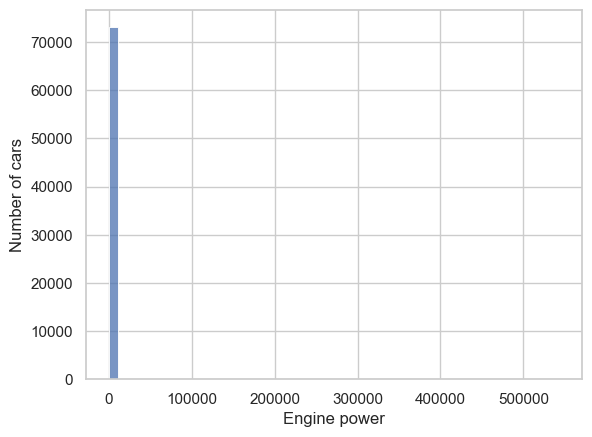

In [87]:
sns.histplot(data=train_set, x=train_set['Engine power'], bins = 50, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Engine power')

Text(0.5, 0, 'Engine power')

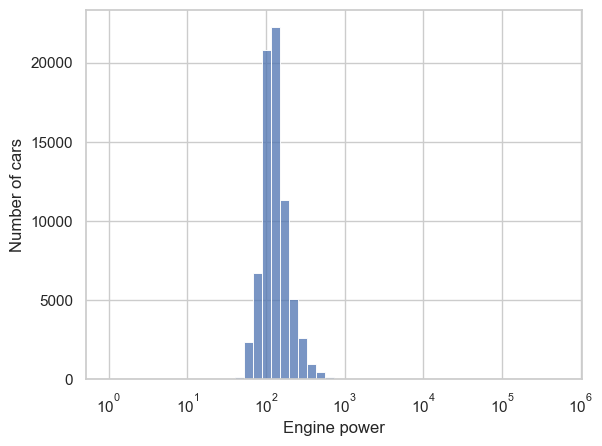

In [88]:
sns.histplot(data=train_set, x=train_set['Engine power'], bins = 50, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Engine power')

In [89]:
train_set['Engine power'] = train_set['Engine power'].fillna(train_set['Engine power'].median())

In [90]:
missing_values = train_set['Engine power'].isna().sum()
print(missing_values)

0


In [91]:
train_set.columns[train_set.isnull().any()]

Index(['Engine capacity', 'Mileage', 'Age'], dtype='object')

## Replace missing values in "Engine capacity" feat with median

In [92]:
missing_values = train_set['Engine capacity'].isna().sum()
print(missing_values)

3779


Text(0.5, 0, 'Engine capacity')

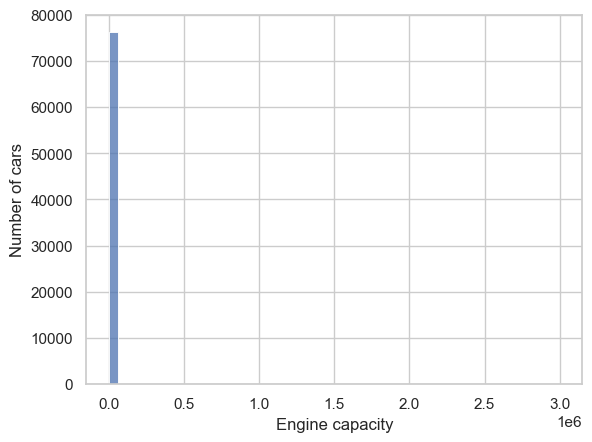

In [93]:
sns.histplot(data=train_set, x=train_set['Engine capacity'], bins = 50, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Engine capacity')

Text(0.5, 0, 'Engine capacity')

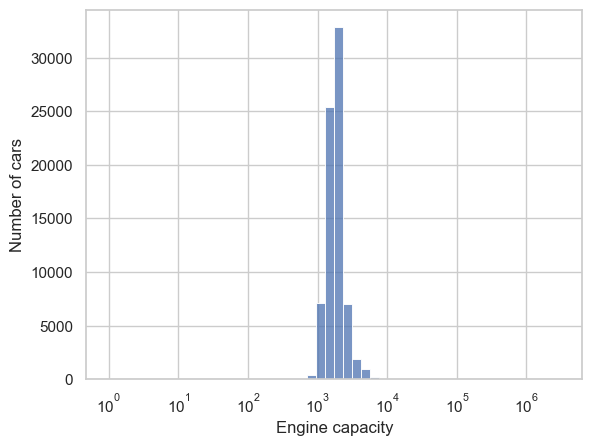

In [94]:
sns.histplot(data=train_set, x=train_set['Engine capacity'], bins = 50, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Engine capacity')

In [95]:
train_set['Engine capacity'] = train_set['Engine capacity'].fillna(train_set['Engine capacity'].median())

In [96]:
missing_values = train_set['Engine power'].isna().sum()
print(missing_values)

0


In [97]:
train_set.columns[train_set.isnull().any()]

Index(['Mileage', 'Age'], dtype='object')

## Replace missing values in "Mileage" feat with median

In [98]:
missing_values = train_set['Mileage'].isna().sum()
print(missing_values)

227


Text(0.5, 0, 'Mileage')

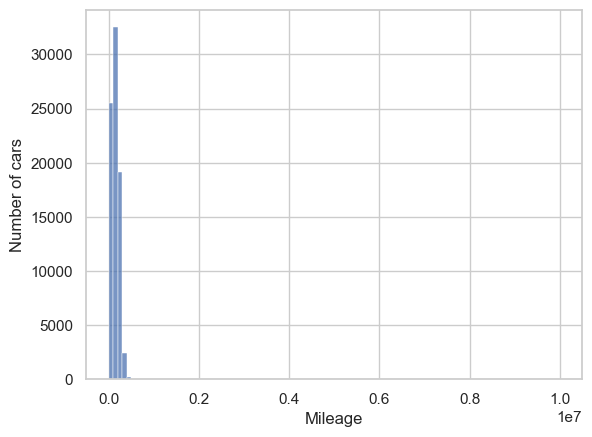

In [99]:
sns.histplot(data=train_set, x=train_set['Mileage'], bins = 100, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Mileage')

In [100]:
train_set['Mileage'] = train_set['Mileage'].fillna(train_set['Mileage'].median())

In [101]:
missing_values = train_set['Mileage'].isna().sum()
print(missing_values)

0


In [102]:
train_set.columns[train_set.isnull().any()]

Index(['Age'], dtype='object')

## Replace missing values in "Age" feat with median

In [103]:
missing_values = train_set['Age'].isna().sum()
print(missing_values)

68


Text(0.5, 0, 'Age')

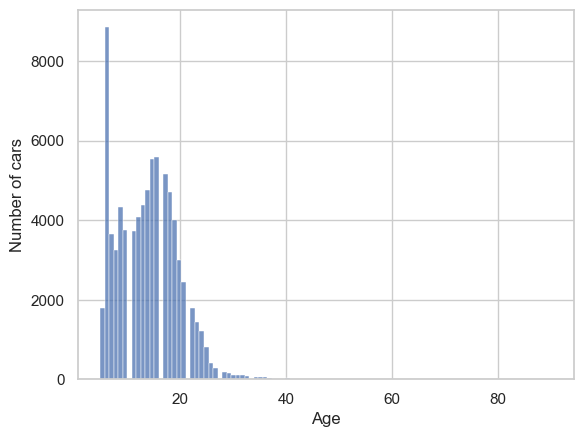

In [104]:
sns.histplot(data=train_set, x=train_set['Age'], bins = 100, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Age')

In [105]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())

In [106]:
missing_values = train_set['Age'].isna().sum()
print(missing_values)

0


## Change dtype float to int

In [107]:
train_set['Age'] = train_set['Age'].astype(int)

In [108]:
train_set['Engine power'] = train_set['Engine power'].astype(int)

In [109]:
train_set['Door count'] = train_set['Door count'].astype(int)

In [110]:
train_set['Door count'] = train_set['Door count'].astype(str)

In [111]:
train_set['Mileage'] = train_set['Mileage'].astype(int)

In [112]:
train_set['Engine capacity'] = train_set['Engine capacity'].astype(int)

# Handling outliers

In [113]:
def outlier_analysis(df, col):
    df['Norm ' + df[col].name] = df[col]
    Q75, Q25 = np.percentile(df[col], [75, 25])
    IQR = Q75 - Q25
    min = Q25 - (IQR*1.5)
    max = Q75 + (IQR*1.5)
    for i in range(df.shape[0]):
        if(df.loc[i, 'Norm ' + df[col].name] > max):
            df.loc[i, 'Norm ' + df[col].name] = max
        elif(df.loc[i, 'Norm ' + df[col].name] < min):
            df.loc[i, 'Norm ' + df[col].name] = min
    return(df)

In [114]:
train_set.head()

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1199,Tak,200,5,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metallic,6
1,1,41900,24,Polska,Firmy,SUV,Używane,1598,Nie,118808,5,Benzyna,5.0,Automatyczna bezstopniowa (CVT),Missing,117,Czarny,Nie,mazowieckie,Nissan,10.643041,Missing,11
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1364,Tak,106000,3,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metallic,15
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798,Nie,172758,5,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Pearl,15
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250,Tak,97128,5,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metallic,13


Text(0.5, 0, 'Engine capacity')

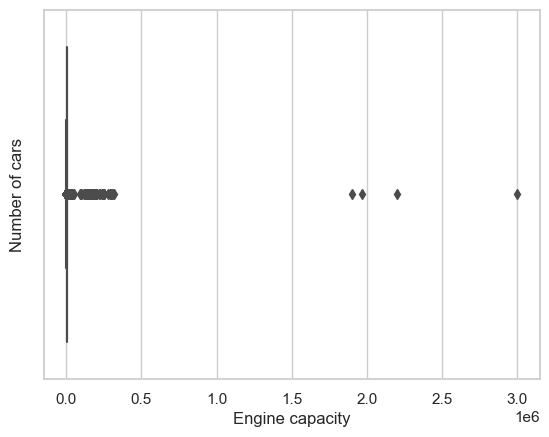

In [115]:
sns.boxplot(data=train_set, x=train_set['Engine capacity'])
plt.ylabel('Number of cars')
plt.xlabel('Engine capacity')

In [116]:
train_set['Engine capacity'].describe()

count    8.012500e+04
mean     2.277137e+03
std      1.788029e+04
min      1.000000e+00
25%      1.560000e+03
50%      1.896000e+03
75%      2.000000e+03
max      3.000218e+06
Name: Engine capacity, dtype: float64

Text(0.5, 0, 'Engine capacity')

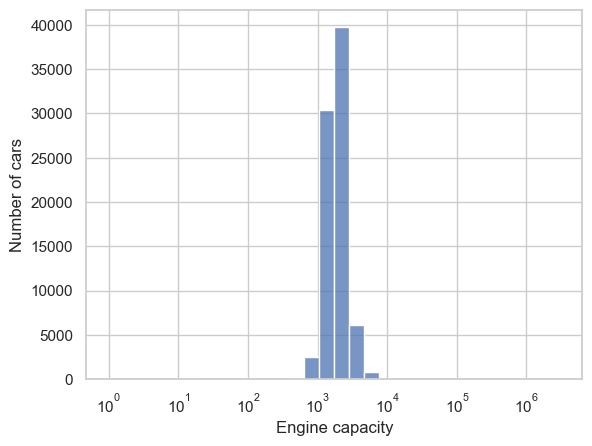

In [117]:
sns.histplot(data=train_set, x=train_set['Engine capacity'], bins = 30, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Engine capacity')

In [118]:
train_set['Norm Engine capacity'] = np.log(train_set['Engine capacity'])

Text(0.5, 0, 'Norm Engine capacity')

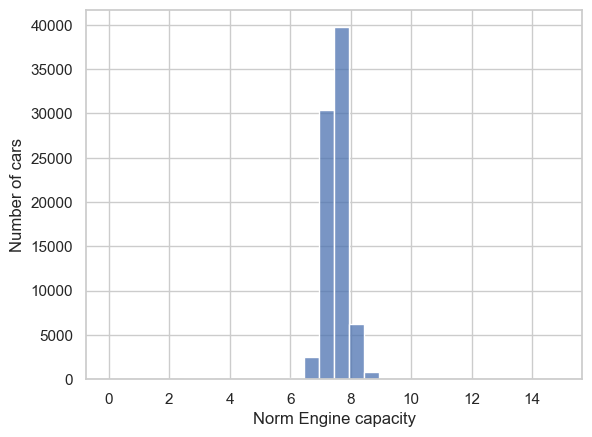

In [119]:
sns.histplot(data=train_set, x=train_set['Norm Engine capacity'], bins = 30, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Norm Engine capacity')

Text(0.5, 0, 'Mileage')

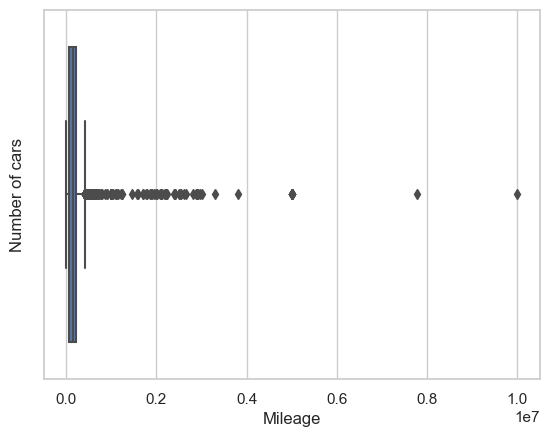

In [120]:
sns.boxplot(data=train_set, x=train_set['Mileage'])
plt.ylabel('Number of cars')
plt.xlabel('Mileage')

In [121]:
train_set['Mileage'].describe()

count    8.012500e+04
mean     1.447109e+05
std      1.232900e+05
min      0.000000e+00
25%      6.900000e+04
50%      1.545260e+05
75%      2.050000e+05
max      9.999999e+06
Name: Mileage, dtype: float64

In [122]:
outlier_analysis(train_set, 'Mileage')

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age,Norm Engine capacity,Norm Mileage
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1199,Tak,200,5,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metallic,6,7.089243,200
1,1,41900,24,Polska,Firmy,SUV,Używane,1598,Nie,118808,5,Benzyna,5.0,Automatyczna bezstopniowa (CVT),Missing,117,Czarny,Nie,mazowieckie,Nissan,10.643041,Missing,11,7.376508,118808
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1364,Tak,106000,3,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metallic,15,7.218177,106000
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798,Nie,172758,5,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Pearl,15,7.494430,172758
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250,Tak,97128,5,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metallic,13,7.130899,97128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80120,80121,22800,27,Missing,Firmy,sedan/coupe/cabrio,Używane,200,Tak,220000,5,Diesel,5.0,Missing,Missing,136,Srebrny,Nie,mazowieckie,BMW,10.034516,Missing,16,5.298317,220000
80121,80122,29900,34,Niemcy,Osoby prywatnej,Kompakt,Używane,1995,Nie,110000,5,Diesel,5.0,Manualna,Na tylne koła,116,Szary,Nie,dolnoslaskie,BMW,10.305614,Metallic,14,7.598399,110000
80122,80123,42500,0,Missing,Osoby prywatnej,Kompakt,Używane,1600,Nie,75000,5,Diesel,5.0,Manualna,Na przednie koła,112,Czarny,Nie,wielkopolskie,Citroën,10.657259,Missing,10,7.377759,75000
80123,80124,4900,14,Missing,Osoby prywatnej,Kombi,Używane,2000,Nie,320000,5,Benzyna,5.0,Manualna,4x4 (dołączany ręcznie),125,Srebrny,Nie,mazowieckie,Subaru,8.496990,Metallic,23,7.600902,320000


Text(0.5, 0, 'Norm Mileage')

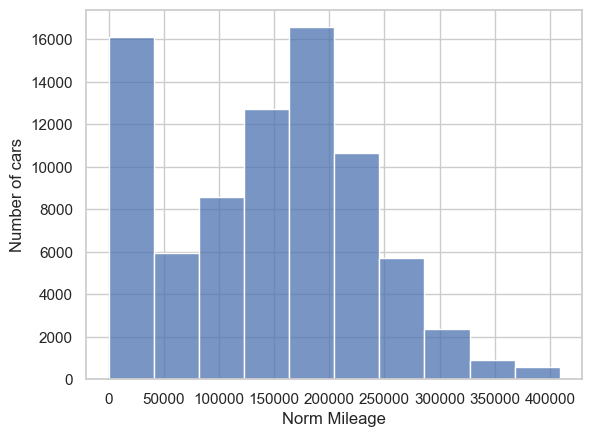

In [123]:
sns.histplot(data=train_set, x=train_set['Norm Mileage'], bins = 10, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Norm Mileage')

Text(0.5, 0, 'Engine power')

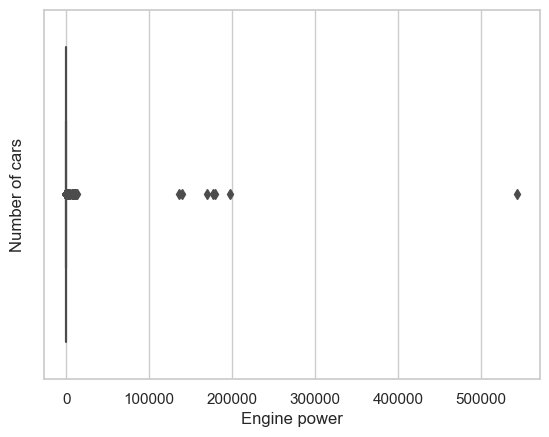

In [124]:
sns.boxplot(data=train_set, x=train_set['Engine power'])
plt.ylabel('Number of cars')
plt.xlabel('Engine power')

In [125]:
train_set['Engine power'].describe()

count     80125.000000
mean        162.862827
std        2411.555310
min           1.000000
25%         105.000000
50%         130.000000
75%         156.000000
max      543848.000000
Name: Engine power, dtype: float64

Text(0.5, 0, 'Engine power')

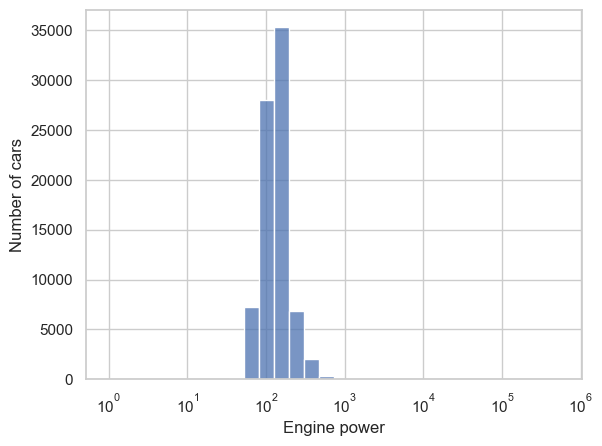

In [126]:
sns.histplot(data=train_set, x=train_set['Engine power'], bins = 30, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Engine power')

In [127]:
train_set['Norm Engine power'] = np.log(train_set['Engine power'])

Text(0.5, 0, 'Norm Engine power')

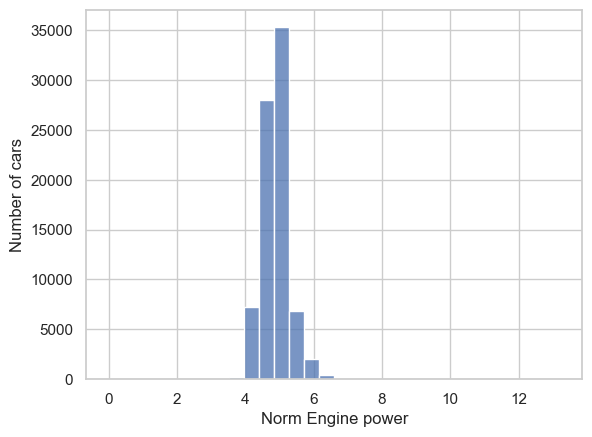

In [128]:
sns.histplot(data=train_set, x=train_set['Norm Engine power'], bins = 30, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Norm Engine power')

Text(0.5, 0, 'Age')

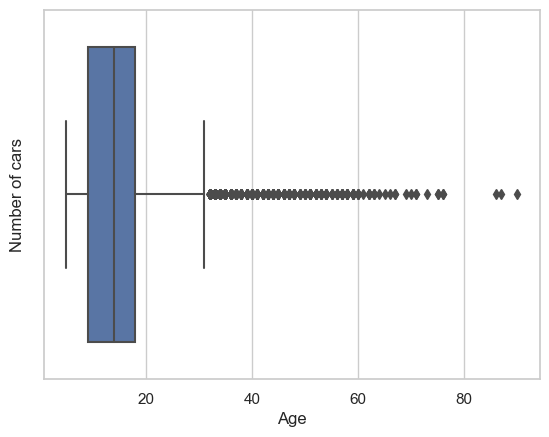

In [129]:
sns.boxplot(data=train_set, x=train_set['Age'])
plt.ylabel('Number of cars')
plt.xlabel('Age')

In [130]:
train_set['Age'].describe()

count    80125.000000
mean        13.936811
std          5.980717
min          5.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         90.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

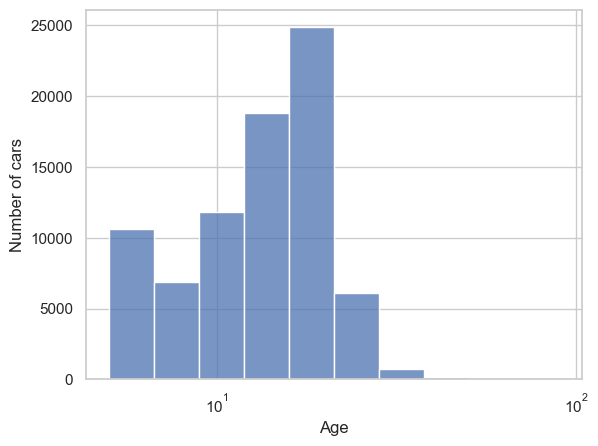

In [131]:
sns.histplot(data=train_set, x=train_set['Age'], bins = 10, log_scale=True)
plt.ylabel('Number of cars')
plt.xlabel('Age')

In [132]:
train_set['Norm Age'] = np.log(train_set['Age'])

Text(0.5, 0, 'Norm Age')

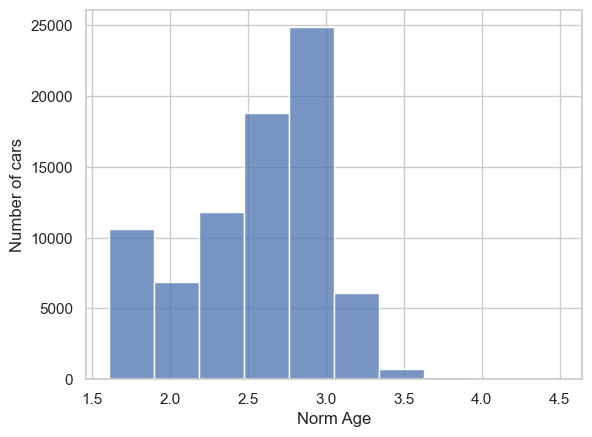

In [133]:
sns.histplot(data=train_set, x=train_set['Norm Age'], bins = 10, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Norm Age')

Text(0.5, 0, 'Amenities')

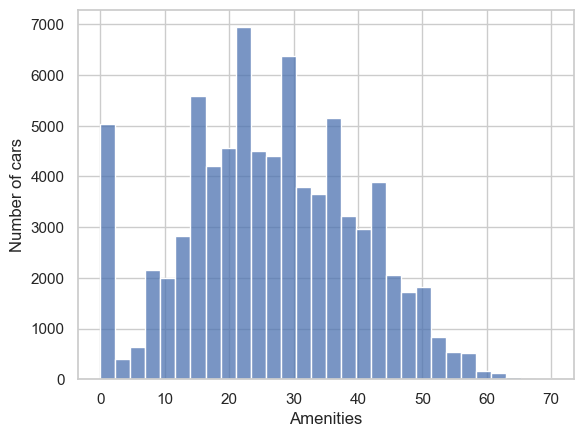

In [134]:
sns.histplot(data=train_set, x=train_set['amenities'], bins = 30, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Amenities')

In [135]:
train_set['amenities'].describe()

count    80125.000000
mean        26.449822
std         13.465383
min          0.000000
25%         17.000000
50%         26.000000
75%         36.000000
max         70.000000
Name: amenities, dtype: float64

In [136]:
outlier_analysis(train_set, 'amenities')

,index,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age,Norm Engine capacity,Norm Mileage,Norm Engine power,Norm Age,Norm amenities
0,0,63900,38,Polska,Firmy,Kompakt,Używane,1199,Tak,200,5,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metallic,6,7.089243,200,4.700480,1.791759,38.0
1,1,41900,24,Polska,Firmy,SUV,Używane,1598,Nie,118808,5,Benzyna,5.0,Automatyczna bezstopniowa (CVT),Missing,117,Czarny,Nie,mazowieckie,Nissan,10.643041,Missing,11,7.376508,118808,4.762174,2.397895,24.0
2,2,17950,28,Niemcy,Firmy,Coupe,Używane,1364,Tak,106000,3,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metallic,15,7.218177,106000,4.499810,2.708050,28.0
3,3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798,Nie,172758,5,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Pearl,15,7.494430,172758,5.075174,2.708050,35.0
4,4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250,Tak,97128,5,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metallic,13,7.130899,97128,4.406719,2.564949,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80120,80121,22800,27,Missing,Firmy,sedan/coupe/cabrio,Używane,200,Tak,220000,5,Diesel,5.0,Missing,Missing,136,Srebrny,Nie,mazowieckie,BMW,10.034516,Missing,16,5.298317,220000,4.912655,2.772589,27.0
80121,80122,29900,34,Niemcy,Osoby prywatnej,Kompakt,Używane,1995,Nie,110000,5,Diesel,5.0,Manualna,Na tylne koła,116,Szary,Nie,dolnoslaskie,BMW,10.305614,Metallic,14,7.598399,110000,4.753590,2.639057,34.0
80122,80123,42500,0,Missing,Osoby prywatnej,Kompakt,Używane,1600,Nie,75000,5,Diesel,5.0,Manualna,Na przednie koła,112,Czarny,Nie,wielkopolskie,Citroën,10.657259,Missing,10,7.377759,75000,4.718499,2.302585,0.0
80123,80124,4900,14,Missing,Osoby prywatnej,Kombi,Używane,2000,Nie,320000,5,Benzyna,5.0,Manualna,4x4 (dołączany ręcznie),125,Srebrny,Nie,mazowieckie,Subaru,8.496990,Metallic,23,7.600902,320000,4.828314,3.135494,14.0


Text(0.5, 0, 'Norm Amenities')

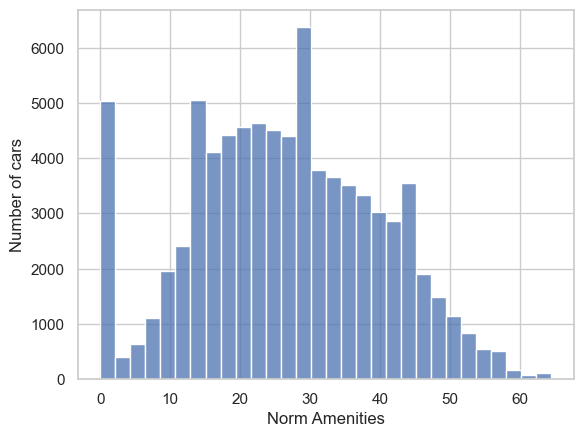

In [137]:
sns.histplot(data=train_set, x=train_set['Norm amenities'], bins = 30, log_scale=False)
plt.ylabel('Number of cars')
plt.xlabel('Norm Amenities')

In [138]:
train_set['Norm amenities'] = train_set['Norm amenities'].astype(int)

In [139]:
train_set.to_csv('./train_set_new.csv', index=False)